In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data
df = pd.read_csv("/content/creditcard (1).csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#understanding the data
df.shape
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#handling any missing values if present still it shows 0
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#checking for duplicate values
print("Checking for duplicate rows:")
print(df.duplicated().sum())

Checking for duplicate rows:
1081


In [ ]:
#removing duplicate values
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


In [ ]:
# Handling outliers in data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection
threshold = 1.5
df_outliers_removed = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

print(f"Dataset size before outlier removal: {df.shape}")
print(f"Dataset size after outlier removal: {df_outliers_removed.shape}")

Dataset size before outlier removal: (284807, 31)
Dataset size after outlier removal: (146319, 31)


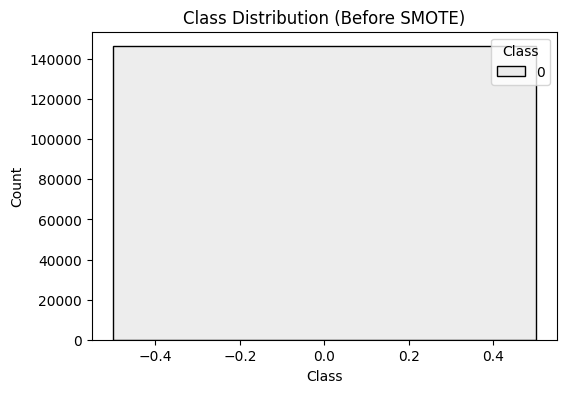

In [ ]:
# Checking for Class Imbalance
plt.figure(figsize=(6,4))
sns.histplot(x='Class', data=df_outliers_removed, palette='coolwarm', hue='Class')
plt.title("Class Distribution (Before SMOTE)")
plt.show()

In [ ]:
#Handling class imbalance by SMOTE
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

Class distribution before SMOTE: Counter({0: 284315, 1: 492})


In [ ]:
# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 227451, 1: 113725})


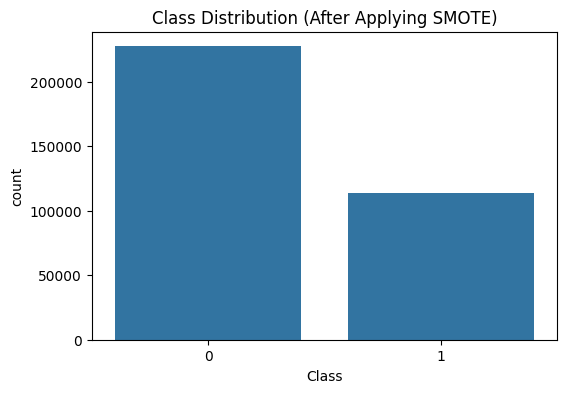

In [ ]:
# Visualizing the new class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution (After Applying SMOTE)")
plt.show()

In [ ]:
#feauture engineering

# Log Transformation of Amount (reduces skewness)
df_outliers_removed['Log_Amount'] = np.log1p(df_outliers_removed['Amount'])

# Extract Hour from Time column
df_outliers_removed['Transaction_Hour'] = (df_outliers_removed['Time'] // 3600) % 24

# Rolling Mean of Transaction Amount (last 3 transactions)
df_outliers_removed['Rolling_Amount_Mean'] = df_outliers_removed['Amount'].rolling(window=3, min_periods=1).mean()

# Transaction Amount Deviation (Z-score)
df_outliers_removed['Amount_Zscore'] = zscore(df_outliers_removed['Amount'])

# High-Risk Transaction Flag (Top 1% Amounts)
threshold = df_outliers_removed['Amount'].quantile(0.99)
df_outliers_removed['High_Risk_Flag'] = (df_outliers_removed['Amount'] > threshold).astype(int)

# Print first 5 rows to verify
print(df_outliers_removed[['Amount', 'Log_Amount', 'Transaction_Hour', 'Rolling_Amount_Mean', 'Amount_Zscore', 'High_Risk_Flag']].head())

# Transaction Amount Risk Score (based on percentile ranking)
df_outliers_removed['Amount_Risk_Score'] = df_outliers_removed['Amount'].rank(pct=True)

# Time Since Last Transaction (Detecting unusually rapid transactions)
df_outliers_removed['Time_Difference'] = df_outliers_removed['Time'].diff().fillna(0)

#Mean Transaction Amount per Customer (Deviation from Normal Spending)
df_outliers_removed['Mean_Amount_Per_User'] = df_outliers_removed.groupby('Transaction_Hour')['Amount'].transform('mean')

#Standard Deviation of Past Transactions (Fraudulent transactions often have high deviation)
df_outliers_removed['Std_Amount_Per_User'] = df_outliers_removed.groupby('Transaction_Hour')['Amount'].transform('std').fillna(0)

#Transaction Velocity (Number of Transactions in Last Hour)
df_outliers_removed['Transaction_Count_Last_Hour'] = df_outliers_removed.groupby('Transaction_Hour')['Amount'].transform('count')

#Print first 5 rows to verify
print(df_outliers_removed[['Amount', 'Amount_Risk_Score', 'Time_Difference', 'Mean_Amount_Per_User', 'Std_Amount_Per_User', 'Transaction_Count_Last_Hour']].head())




   Amount  Log_Amount  Transaction_Hour  Rolling_Amount_Mean  Amount_Zscore  \
0  149.62    5.014760               0.0           149.620000       2.743117   
1    2.69    1.305626               0.0            76.155000      -0.770092   
3  123.50    4.824306               0.0            91.936667       2.118568   
4   69.99    4.262539               0.0            65.393333       0.839102   
5    3.67    1.541159               0.0            65.720000      -0.746660   

   High_Risk_Flag  
0               0  
1               0  
3               0  
4               0  
5               0  
   Amount  Amount_Risk_Score  Time_Difference  Mean_Amount_Per_User  \
0  149.62           0.969505              0.0             29.308256   
1    2.69           0.213978              0.0             29.308256   
3  123.50           0.939266              1.0             29.308256   
4   69.99           0.825276              1.0             29.308256   
5    3.67           0.235226              0.0     

In [ ]:
# Feature Scaling
scaler = RobustScaler()
X_resampled = scaler.fit_transform(X_train_resampled)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_train_resampled, test_size=0.2, random_state=42)

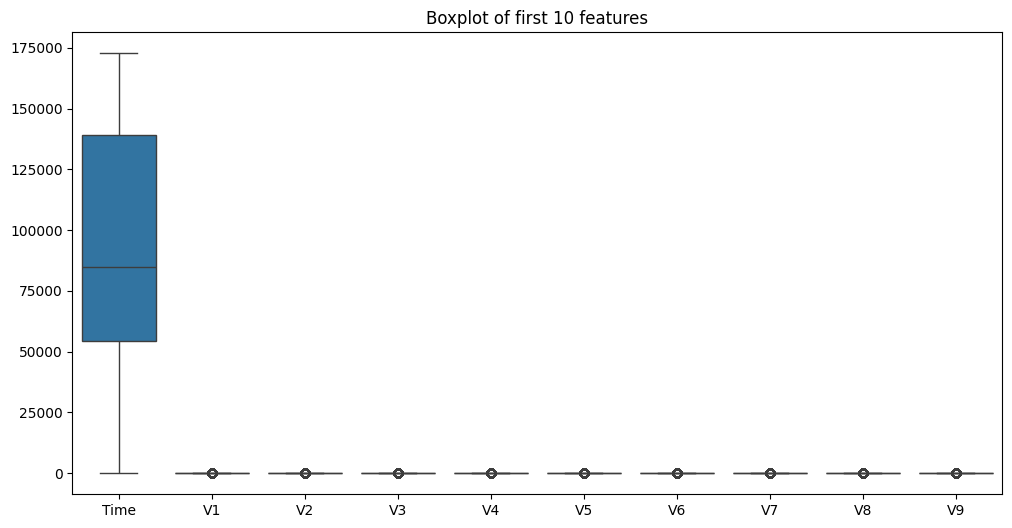

In [ ]:
#EDA(10 charts)

#1)Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.iloc[:, :10])
plt.title("Boxplot of first 10 features")
plt.show()



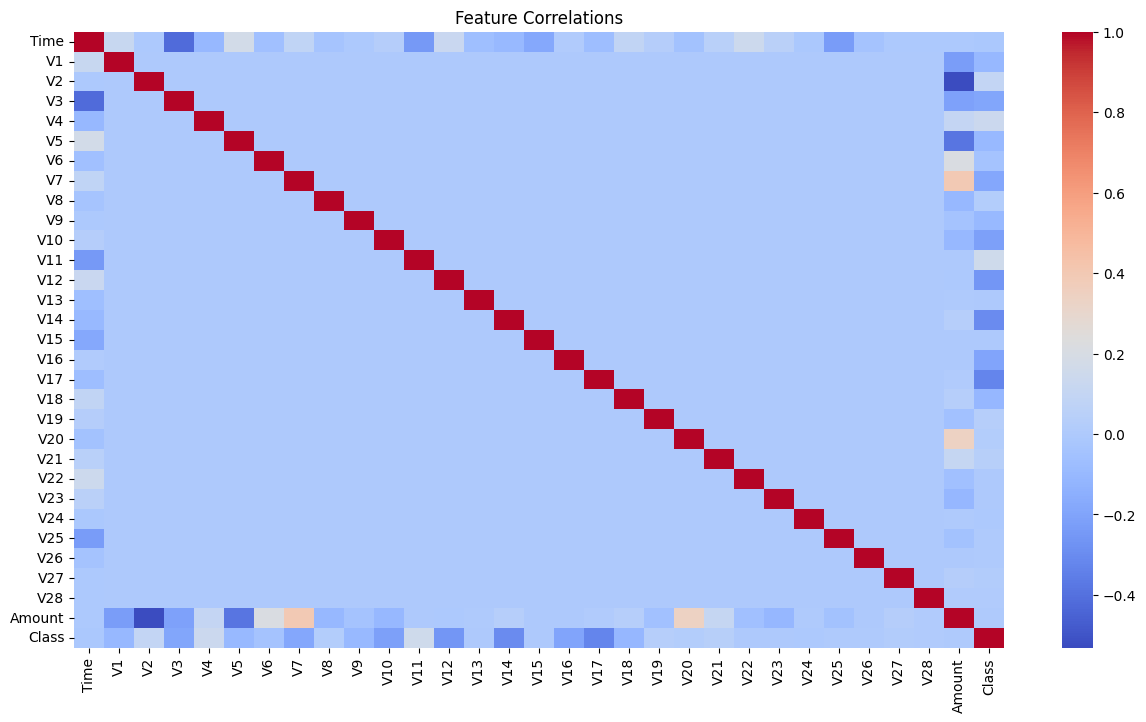

In [ ]:
#2)Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlations")
plt.show()

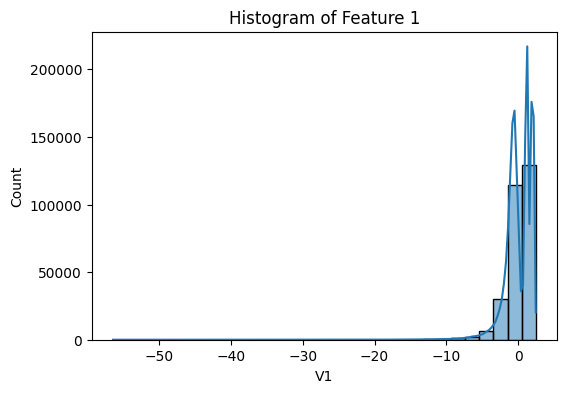

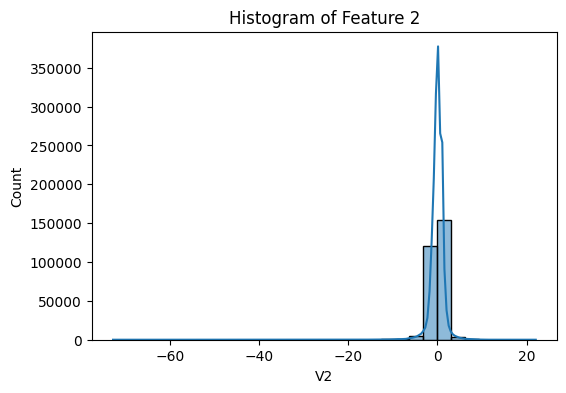

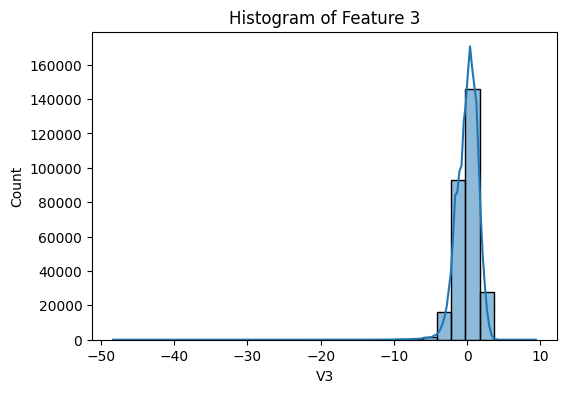

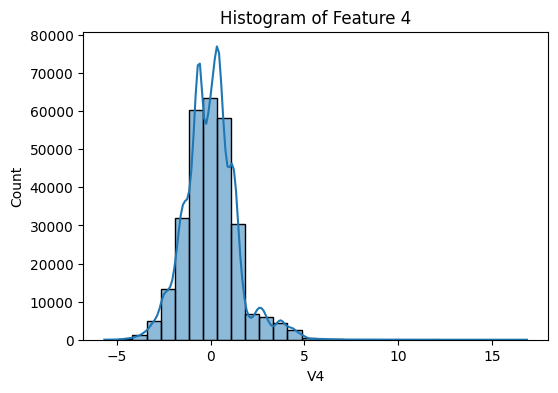

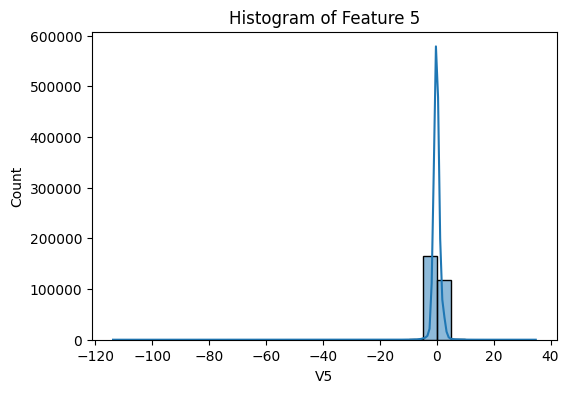

In [ ]:
#3)histogram
for i in range(1, 6):
    plt.figure(figsize=(6,4))
    sns.histplot(df.iloc[:,i], kde=True, bins=30)
    plt.title(f"Histogram of Feature {i}")
    plt.show()

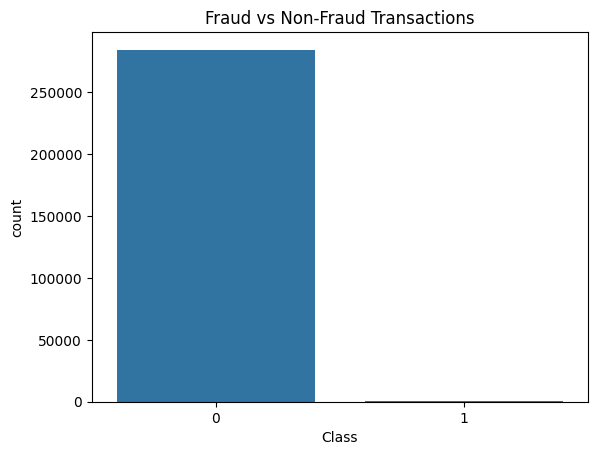

In [ ]:
#4)Countplot
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

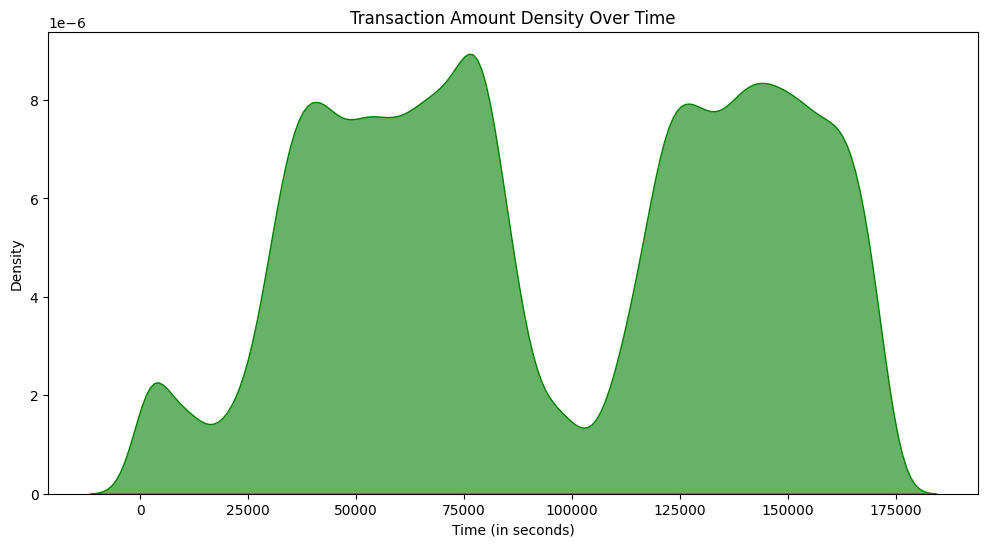

In [ ]:
#5)# KDE plot for transaction amounts across time
plt.figure(figsize=(12, 6))
sns.kdeplot(df["Time"], fill=True, color="green", alpha=0.6)
plt.xlabel("Time (in seconds)")
plt.ylabel("Density")
plt.title("Transaction Amount Density Over Time")
plt.show()

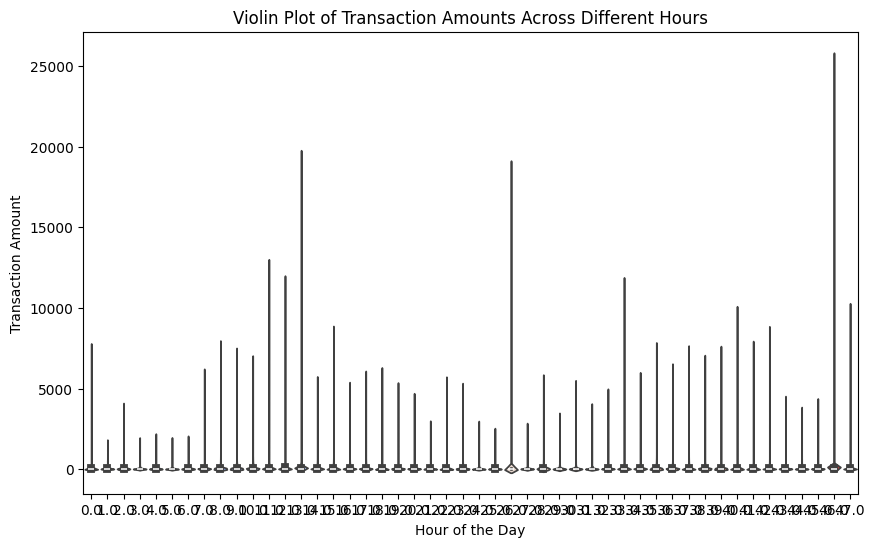

In [ ]:
#6)violin plot
# Convert seconds to hours
df["Hour"] = df["Time"] // 3600
plt.figure(figsize=(10, 6))
sns.violinplot(x="Hour", y="Amount", data=df, palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Amount")
plt.title("Violin Plot of Transaction Amounts Across Different Hours")
plt.show()

In [ ]:
#ML Models

#1)Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
#2)Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
#Ensemble Techniques
#3) Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
#4)XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
#5)Gradient Boosting Machine
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
#Hyperparameter Tuning(Random Search CV)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

random_search = RandomizedSearchCV(XGBClassifier(), param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [ ]:
#Deep Learning Models

#1)LSTM Model
X_train_dl = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_dl = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_dl.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test))

Epoch 1/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9479 - loss: 0.1506 - val_accuracy: 0.9788 - val_loss: 0.0576
Epoch 2/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - accuracy: 0.9812 - loss: 0.0520 - val_accuracy: 0.9890 - val_loss: 0.0304
Epoch 3/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9904 - loss: 0.0274 - val_accuracy: 0.9945 - val_loss: 0.0153
Epoch 4/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9857 - val_loss: 0.0644
Epoch 5/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9979 - val_loss: 0.0072
Epoch 6/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9966 - val_loss: 0.0107
Epoch 7/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9963 - val_loss: 0.0119
Epoch 8/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9978 - loss: 0

In [ ]:
#2)RNN Model
rnn_model = Sequential([
    layers.SimpleRNN(64, input_shape=(X_train_dl.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    layers.SimpleRNN(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test))


Epoch 1/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.9751 - loss: 0.0780 - val_accuracy: 0.9953 - val_loss: 0.0154
Epoch 2/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9887 - val_loss: 0.0365
Epoch 3/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9958 - val_loss: 0.0141
Epoch 4/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9961 - val_loss: 0.0142
Epoch 5/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9870 - val_loss: 0.0420
Epoch 6/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 86s 7ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9924 - val_loss: 0.0238
Epoch 7/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9951 - val_loss: 0.0168
Epoch 8/10
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.9907 - loss: 0

In [ ]:
#3)GAN Model
def build_generator():
    model = Sequential([
        Dense(128, activation="relu", input_dim=X_train.shape[1]),
        Dense(256, activation="relu"),
        Dense(X_train.shape[1], activation="sigmoid")
    ])
    return model

def build_discriminator():
    model = Sequential([
        Dense(256, activation="relu", input_dim=X_train.shape[1]),
        Dense(128, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()

gan = Sequential([generator, discriminator])

discriminator.compile(optimizer=Adam(learning_rate=0.0002), loss="binary_crossentropy", metrics=["accuracy"])
gan.compile(optimizer=Adam(learning_rate=0.0002), loss="binary_crossentropy")

In [ ]:
# Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUROC: {roc_auc:.4f}")



In [ ]:
# Evaluate all models
evaluate_model(lr, X_test, y_test, "Logistic Regression")
evaluate_model(dt, X_test, y_test, "Decision Tree")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")
evaluate_model(gbm, X_test, y_test, "Gradient Boosting Machine")
evaluate_model(random_search.best_estimator_, X_test, y_test, "Tuned XGBoost")
evaluate_model(lstm_model, X_test_dl, y_test, "LSTM Model")
evaluate_model(rnn_model, X_test_dl, y_test, "RNN Model")
evaluate_model(gan, X_test_dl, y_test, "GAN Model")



Model: Logistic Regression
Accuracy: 0.9834
Precision: 0.9866
Recall: 0.9629
F1 Score: 0.9746
AUROC: 0.9782

Model: Decision Tree
Accuracy: 0.9975
Precision: 0.9943
Recall: 0.9982
F1 Score: 0.9963
AUROC: 0.9977

Model: Random Forest
Accuracy: 0.9999
Precision: 0.9997
Recall: 0.9999
F1 Score: 0.9998
AUROC: 0.9999

Model: XGBoost
Accuracy: 0.9999
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998
AUROC: 0.9999

Model: Gradient Boosting Machine
Accuracy: 0.9885
Precision: 0.9918
Recall: 0.9734
F1 Score: 0.9825
AUROC: 0.9847

Model: Tuned XGBoost
Accuracy: 0.9998
Precision: 0.9994
Recall: 1.0000
F1 Score: 0.9997
AUROC: 0.9999
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step

Model: LSTM Model
Accuracy: 0.9973
Precision: 0.9938
Recall: 0.9981
F1 Score: 0.9959
AUROC: 0.9975
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

Model: RNN Model
Accuracy: 0.9881
Precision: 0.9708
Recall: 0.9939
F1 Score: 0.9822
AUROC: 0.9895
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Model: GAN Model
Accuracy: 0.6683
Precis

In [ ]:
# Evaluate Model Performance

print("\n Logistic Regression Model performance")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("AUROC Score:", roc_auc_score(y_test, y_pred_lr))

print("\n Decision Tree model performance")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("AUROC Score:", roc_auc_score(y_test, y_pred_dt))

print("\n Random Forest Model Performance ")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("AUROC Score:", roc_auc_score(y_test, y_pred_rf))

print("\n XGBoost Model Performance ")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("AUROC Score:", roc_auc_score(y_test, y_pred_xgb))

print("\n GBM Model Performance ")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))
print("AUROC Score:", roc_auc_score(y_test, y_pred_gbm))




 Logistic Regression Model performance
Confusion Matrix:
 [[45307   296]
 [  839 21794]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     45603
           1       0.99      0.96      0.97     22633

    accuracy                           0.98     68236
   macro avg       0.98      0.98      0.98     68236
weighted avg       0.98      0.98      0.98     68236

AUROC Score: 0.9782197167846923

 Decision Tree model performance
Confusion Matrix:
 [[45473   130]
 [   40 22593]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45603
           1       0.99      1.00      1.00     22633

    accuracy                           1.00     68236
   macro avg       1.00      1.00      1.00     68236
weighted avg       1.00      1.00      1.00     68236

AUROC Score: 0.9976909897319318

 Random Forest Model Performance 
Confusion Matrix:
 [[45